<a href="https://colab.research.google.com/github/IvanNeverov/PersonalTDA/blob/main/TDA_1_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

In [ ]:
!sudo apt update && sudo apt install --yes python3 python3-pip && \
!pip3 install psycopg2-binary

In [ ]:
# import psycopg2

# conn = psycopg2.connect("""
#     host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
#     port=6432
#     sslmode=verify-full
#     dbname=db_clients
#     user=mlhs_student
#     password=mlhs_student
#     target_session_attrs=read-write
# """)

##Загрузка данных

In [ ]:
import pandas as pd
df = pd.read_csv('/deposits_data.csv')

##Обработка

In [ ]:
# df.head()
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.deposit.value_counts()
df.default = df.default.map(dict(no = 0, yes=1))
df.housing = df.housing.map(dict(no = 0, yes=1))
df.loan = df.loan.map(dict(no = 0, yes=1))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(10), object(7)
memory usage: 1.4+ MB


In [ ]:
df.drop_duplicates(inplace = True)


In [ ]:
df.deposit.value_counts() 

no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
df.groupby('deposit').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
deposit,,,,,,,,,,
no,40.837391,0.019751,1280.227141,0.569726,0.166184,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354


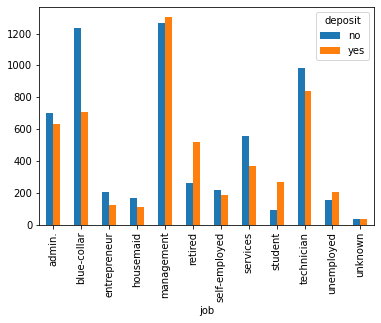

In [ ]:
pd.crosstab(df.job,df.deposit).plot(kind='bar')

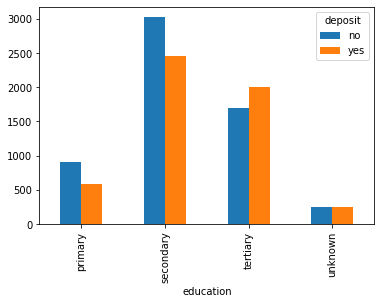

In [ ]:
pd.crosstab(df.education,df.deposit).plot(kind='bar')

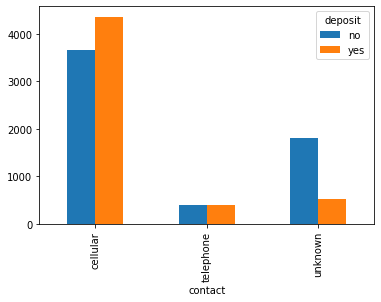

In [ ]:
pd.crosstab(df.contact,df.deposit).plot(kind='bar')

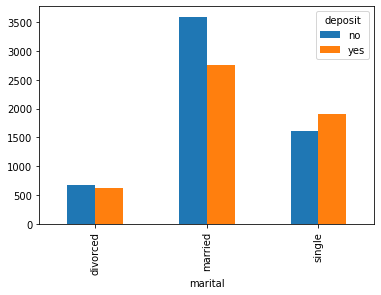

In [ ]:
pd.crosstab(df.marital,df.deposit).plot(kind='bar')

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000


## Построение модели

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['deposit','job','marital','contact','poutcome','education','month'], axis =1)
Y = df.deposit

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.25, random_state=42)

ss= StandardScaler()
ss.fit(Xtrain)

model = LogisticRegression()
model.fit(Xtrain,Ytrain)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
prediction = model.predict(Xtest)
accuracy_score(Ytest,prediction)

0.7556431386599785

In [ ]:
confusion_matrix(Ytest,prediction)

array([[1152,  298],
       [ 384,  957]])

In [ ]:
recall_score(Ytest,prediction, pos_label='no')

0.7944827586206896

In [ ]:
precision_score(Ytest,prediction, pos_label='no')

0.75